In [2]:
import numpy as np
from sklearn.neural_network import BernoulliRBM
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import normalize
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingClassifier

In [5]:
df = pd.read_csv("fashion-mnist_test 2.csv")

In [6]:
print(df.head(5))

   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      0       0       0       0       0       0       0       0       9   
1      1       0       0       0       0       0       0       0       0   
2      2       0       0       0       0       0       0      14      53   
3      2       0       0       0       0       0       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9    ...     pixel775  pixel776  pixel777  pixel778  pixel779  \
0       8    ...          103        87        56         0         0   
1       0    ...           34         0         0         0         0   
2      99    ...            0         0         0         0        63   
3       0    ...          137       126       140         0       133   
4       0    ...            0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  pixel784  
0         0         0         0         0         

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB
None


In [8]:
df['label'] = df['label'].astype(str)

In [11]:
X = df.iloc[:,1:785]
X = normalize(X)
Y = df.iloc[:,0]

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=0)

model = BernoulliRBM(n_components=100, learning_rate = 0.06, n_iter = 20)

gb = GradientBoostingClassifier()
model_gb_regression = Pipeline(
    steps=[('rbm', model), ('gradient boosting', gb)])
model_gb_regression.fit(X_train, Y_train)

Pipeline(memory=None,
     steps=[('rbm', BernoulliRBM(batch_size=10, learning_rate=0.06, n_components=100, n_iter=20,
       random_state=None, verbose=0)), ('gradient boosting', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_fe...    subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False))])

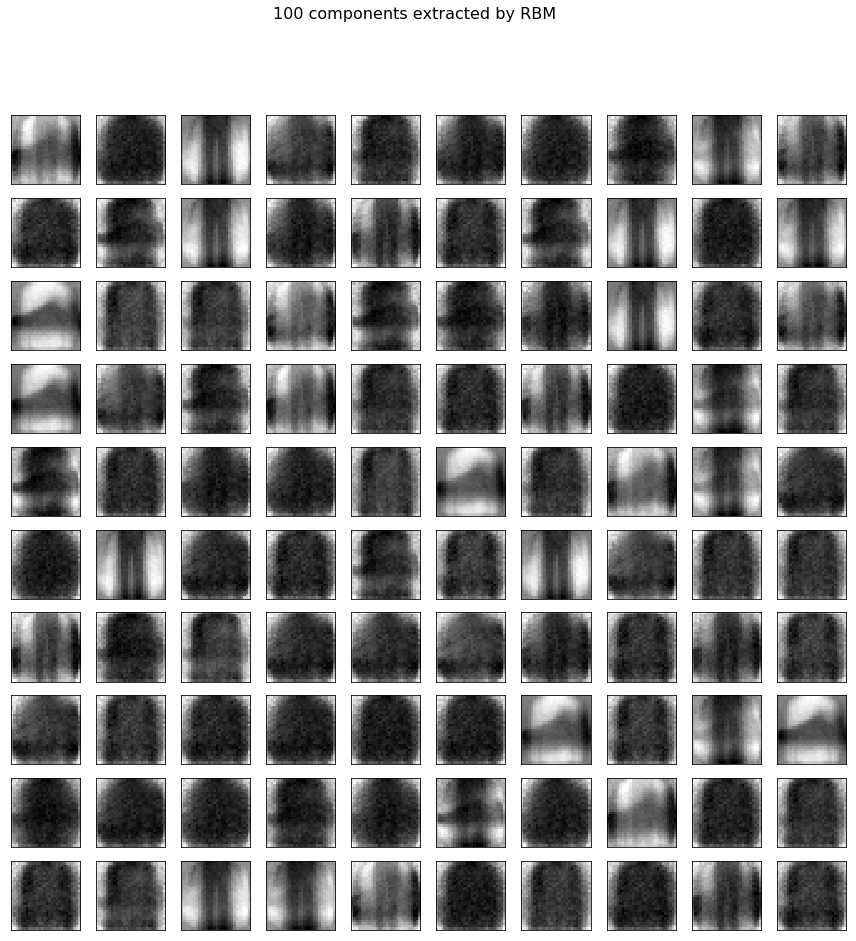

In [21]:
plt.figure(figsize=(15, 15))
for i, comp in enumerate(model.components_):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((28,28 )), cmap=plt.cm.gray_r,
               interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
    plt.suptitle('100 components extracted by RBM', fontsize=16)